# Weather Linear Regression - SkLearn

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,5) # parametre de taille des graphs
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

In [ ]:
df_weather.head(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR
0,2019-01-01,9,4,5.1
1,2019-01-02,8,5,8.7


# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

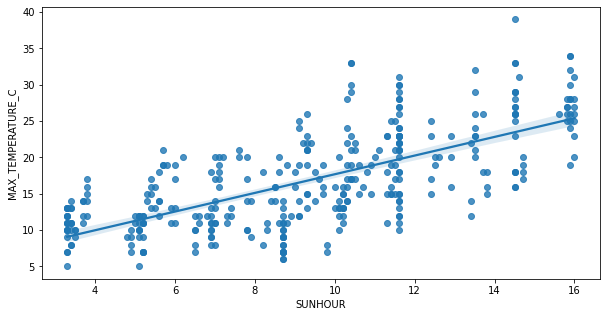

In [ ]:
# Your code here :
sns.regplot(x="SUNHOUR", y="MAX_TEMPERATURE_C", data=df_weather)
plt.show()

## Train the model
You just have to read and execute the code below

In [ ]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']] 

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C'] 

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [ ]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## Prediction for 1 value

In [ ]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]]))

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]] 

*Why ? We'll see that in the next quest.*

In [ ]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
predict_temp = pd.DataFrame(modelLR.predict(df_weather[['SUNHOUR']]), columns=["TEMP_MAX_PREDICT"])
# df_weather["PREDICTION_MAX_TEMP"] = modelLR.predict(df_weather[['SUNHOUR']])

print("check diff nb lignes", len(predict_temp) - len(df_weather))
predict_temp.head(2)

check diff nb lignes 0


,TEMP_MAX_PREDICT
0,11.396823
1,16.020019


In [ ]:
# merge 2 df concat outer join
df_weather_predic = pd.concat([df_weather, predict_temp], axis=1)
df_weather_predic.TEMP_MAX_PREDICT = round(df_weather_predic.TEMP_MAX_PREDICT, 2)
df_weather_predic.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,TEMP_MAX_PREDICT
0,2019-01-01,9,4,5.1,11.40
1,2019-01-02,8,5,8.7,16.02
2,2019-01-03,6,0,8.7,16.02
3,2019-01-04,5,-1,5.1,11.40
4,2019-01-05,6,-1,8.7,16.02


## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is now stored in a column, you can now visualize it. 

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

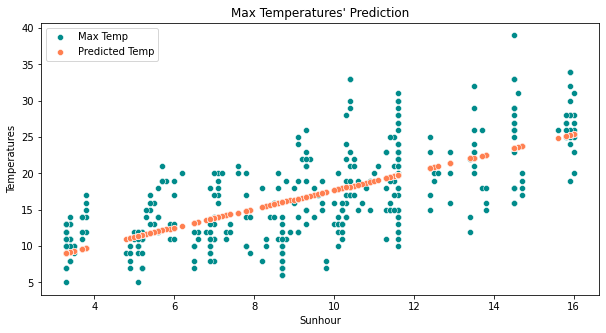

In [ ]:
# Your code here :
sns.scatterplot(x=df_weather_predic.SUNHOUR, y=df_weather_predic.MAX_TEMPERATURE_C, 
                color="darkcyan", label="Max Temp")
sns.scatterplot(x=df_weather_predic.SUNHOUR, y=df_weather_predic.TEMP_MAX_PREDICT, 
                color="coral", label="Predicted Temp")
plt.title("Max Temperatures' Prediction")
plt.xlabel("Sunhour")
plt.ylabel("Temperatures")
plt.legend(loc=2)
plt.show()

Your prediction is stored in a DataFrame. **So, you can visualize your prediction without the "source" column.** Let's try it.
Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

In [ ]:
# colonne date set up
df_weather_predic.DATE = pd.to_datetime(df_weather_predic.DATE)
df_weather_predic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C  365 non-null    int64         
 2   MIN_TEMPERATURE_C  365 non-null    int64         
 3   SUNHOUR            365 non-null    float64       
 4   TEMP_MAX_PREDICT   365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 14.4 KB


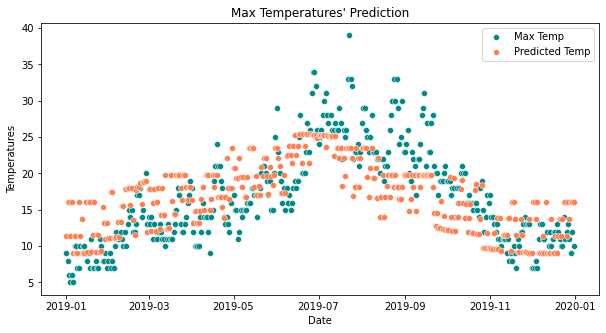

In [ ]:
# Your code here :
sns.scatterplot(x=df_weather_predic.DATE, y=df_weather_predic.MAX_TEMPERATURE_C, 
                color="darkcyan", label="Max Temp")
sns.scatterplot(x=df_weather_predic.DATE, y=df_weather_predic.TEMP_MAX_PREDICT, 
                color="coral", label="Predicted Temp")
plt.title("Max Temperatures' Prediction")
plt.xlabel("Date")
plt.ylabel("Temperatures")
plt.legend(loc=1)
plt.show()

Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

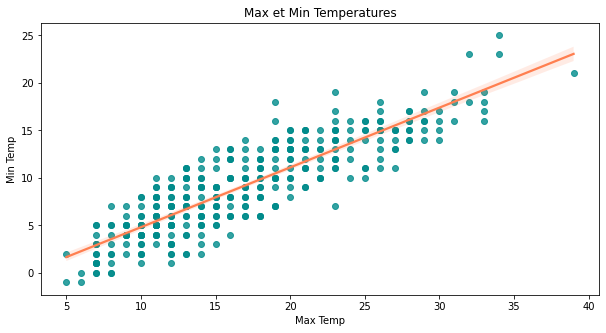

In [ ]:
# step 1
# check regression des 2 variables in chart
sns.regplot(x="MAX_TEMPERATURE_C", 
            y="MIN_TEMPERATURE_C", 
            data=df_weather,
            line_kws={"color": "coral"},
            scatter_kws={"color": "darkcyan"})
plt.title("Max et Min Temperatures")
plt.xlabel("Max Temp")
plt.ylabel("Min Temp")
plt.show()

In [ ]:
# Step 2
# 2 series :
# X-axis : the correlated column : Min temp
X = df_weather[['MIN_TEMPERATURE_C']] 

# Y-axis : the column to predict : MAX Temperature
y = df_weather['MAX_TEMPERATURE_C'] 

# train a machine learning model to find the equation of the linear regression with ".fit" method.
modelLR = LinearRegression().fit(X, y)

In [ ]:
# Step 3
# Explore the model trained
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)

coefficient : [1.22274205]
intercept : 5.689031214578716


In [ ]:
# Step 4
# Prediction of Max Temp from Min Temp with Min Temp = 6

# Hand calculation :
print("By hand :", modelLR.coef_ * 6 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[6]]))

By hand : [13.02548352]
Scikit-Learn :   [13.02548352]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Step 5
# store predictions in df
predict_temp_2 = pd.DataFrame(modelLR.predict(df_weather[['MIN_TEMPERATURE_C']]), columns=["TEMP_MAX_PREDICT"])
print("check diff nb lignes", len(predict_temp) - len(df_weather))
# merge 2 df concat outer join
df_weather_predic_2 = pd.concat([df_weather, predict_temp_2], axis=1)
df_weather_predic_2.head()

check diff nb lignes 0


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,TEMP_MAX_PREDICT
0,2019-01-01,9,4,5.1,10.579999
1,2019-01-02,8,5,8.7,11.802741
2,2019-01-03,6,0,8.7,5.689031
3,2019-01-04,5,-1,5.1,4.466289
4,2019-01-05,6,-1,8.7,4.466289


## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

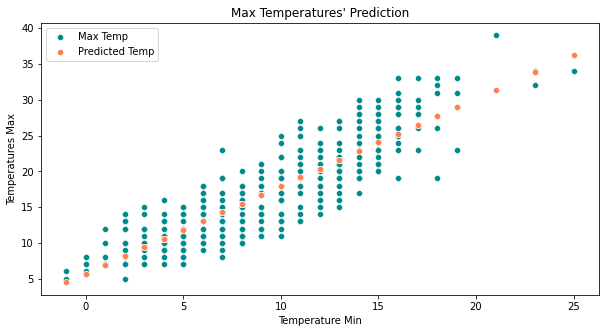

In [ ]:
# Your code here :
sns.scatterplot(x=df_weather_predic_2.MIN_TEMPERATURE_C, y=df_weather_predic_2.MAX_TEMPERATURE_C, 
                color="darkcyan", label="Max Temp")
sns.scatterplot(x=df_weather_predic_2.MIN_TEMPERATURE_C, y=df_weather_predic_2.TEMP_MAX_PREDICT, 
                color="coral", label="Predicted Temp")
plt.title("Max Temperatures' Prediction")
plt.xlabel("Temperature Min")
plt.ylabel("Temperatures Max")
plt.legend(loc=0)
plt.show()

In [ ]:
# colonne date set up
df_weather_predic_2.DATE = pd.to_datetime(df_weather_predic_2.DATE)
df_weather_predic_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DATE               365 non-null    datetime64[ns]
 1   MAX_TEMPERATURE_C  365 non-null    int64         
 2   MIN_TEMPERATURE_C  365 non-null    int64         
 3   SUNHOUR            365 non-null    float64       
 4   TEMP_MAX_PREDICT   365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 14.4 KB


## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

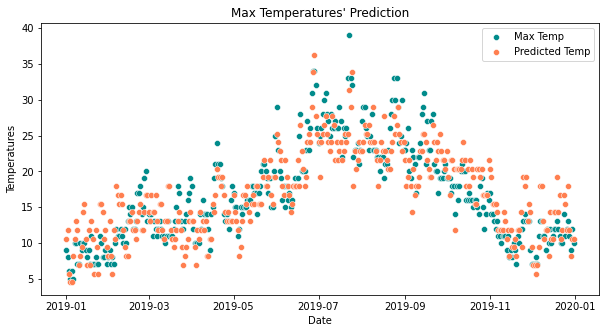

In [ ]:
# Your code here :
sns.scatterplot(x=df_weather_predic_2.DATE, y=df_weather_predic_2.MAX_TEMPERATURE_C, 
                color="darkcyan", label="Max Temp")
sns.scatterplot(x=df_weather_predic_2.DATE, y=df_weather_predic_2.TEMP_MAX_PREDICT, 
                color="coral", label='Predicted Temp')
plt.title("Max Temperatures' Prediction")
plt.xlabel("Date")
plt.ylabel("Temperatures")
plt.legend(loc=1)
plt.show()